<a href="https://colab.research.google.com/github/gautam447/AI-Assignment/blob/main/Project_AI_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
#Cell 1: Install Dependencies
!pip install tensorflow numpy matplotlib seaborn scikit-learn



In [6]:
#Cell 2: Import Required Libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


In [7]:
# Cell 3: Load and Preprocess Data
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values to [0,1] range
x_train, x_test = x_train / 255.0, x_test / 255.0

# Enhanced Data Augmentation
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

# Splitting the dataset
train_generator = train_datagen.flow(x_train, y_train, batch_size=32, subset='training')
val_generator = train_datagen.flow(x_train, y_train, batch_size=32, subset='validation')
test_generator = ImageDataGenerator().flow(x_test, y_test, batch_size=32)


In [8]:
# Cell 4: Load Pre-trained Model and Modify Architecture
# Load pre-trained model (MobileNetV2) without top layers
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
base_model.trainable = True  # Fine-tune some layers

# Freeze all but the last 20 layers
for layer in base_model.layers[:-20]:
    layer.trainable = False

# Add custom classification layers
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)
out = Dense(10, activation='softmax')(x)

# Create new model
model = Model(inputs=base_model.input, outputs=out)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


<ipython-input-8-7887c86aa25e>:3: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3))


In [9]:
# Cell 5: Train the Model
# Train the model
history = model.fit(train_generator, validation_data=val_generator, epochs=15)


Epoch 1/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 179s 116ms/step - accuracy: 0.1780 - loss: 2.7089 - val_accuracy: 0.1114 - val_loss: 2.3103
Epoch 2/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 142s 114ms/step - accuracy: 0.3079 - loss: 2.0510 - val_accuracy: 0.3761 - val_loss: 1.8161
Epoch 3/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 146s 117ms/step - accuracy: 0.3627 - loss: 1.8382 - val_accuracy: 0.4450 - val_loss: 1.6235
Epoch 4/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 142s 114ms/step - accuracy: 0.3989 - loss: 1.7133 - val_accuracy: 0.4699 - val_loss: 1.5003
Epoch 5/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 142s 114ms/step - accuracy: 0.4228 - loss: 1.6390 - val_accuracy: 0.4941 - val_loss: 1.4424
Epoch 6/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 146s 117ms/step - accuracy: 0.4417 - loss: 1.5836 - val_accuracy: 0.5016 - val_loss: 1.4127
Epoch 7/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 147s 118ms/step - accuracy: 0.4594 - loss: 1.5298 - val_accuracy: 0.5008 - val_loss: 1.4273
Epoch 8/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 143s 115ms/step - ac

In [10]:
# Cell 6: Evaluate Model Performance
# Evaluate model performance
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.6019 - loss: 1.1783
Test Accuracy: 0.6031


313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step


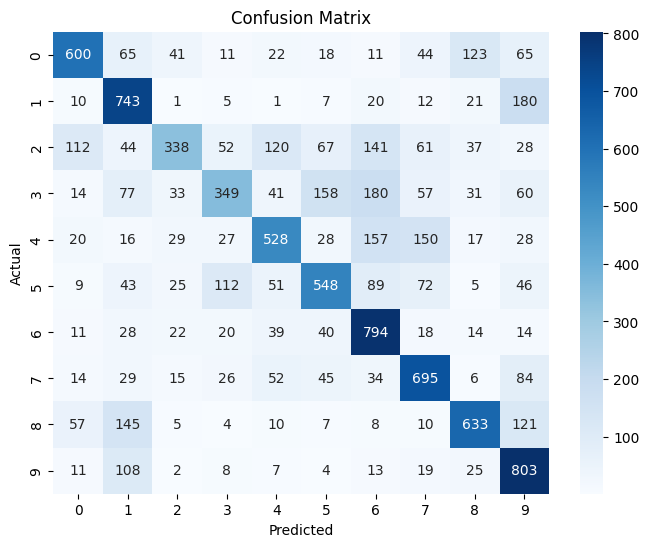

In [11]:
# Cell 7: Generate Confusion Matrix
# Generate confusion matrix
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


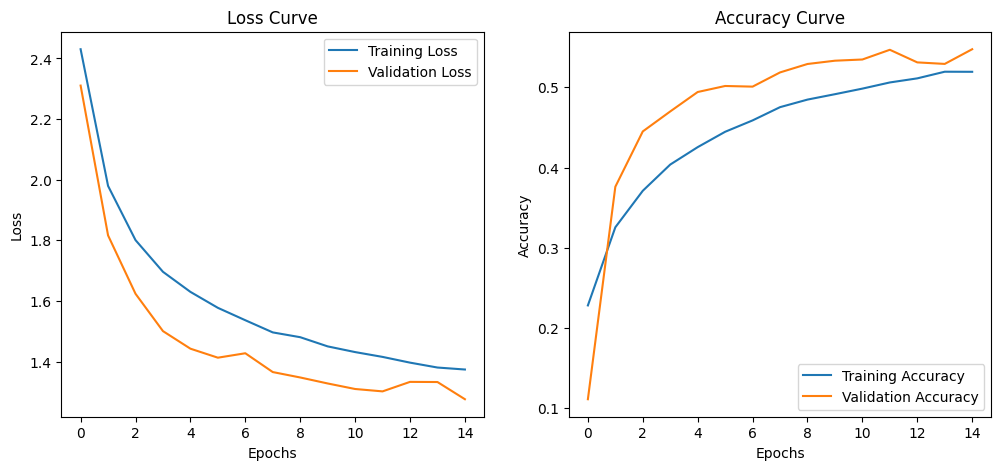

In [12]:
# Cell 8: Plot Training History
# Plot training history
plt.figure(figsize=(12, 5))

# Loss curve
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss Curve")

# Accuracy curve
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Accuracy Curve")

plt.show()
